In [1]:
import pymongo
import json
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

In [2]:
myclient = pymongo.MongoClient("mongodb://localhost:27017/")
mydb = myclient["twitter"]
mycol = mydb["newcol"]

In [3]:
df = pd.DataFrame(list(mycol.find()))

In [4]:
tweet_pol = df['tweet_polarity'].apply(pd.Series)
quote_pol = df['quoted_tweet_polarity'].apply(pd.Series)

In [9]:
df['tweet_polarity_neg'] = tweet_pol['neg']
df['tweet_polarity_neu'] = tweet_pol['neu']
df['tweet_polarity_pos'] = tweet_pol['pos']
df['tweet_polarity_cpd'] = tweet_pol['compound']

df['quoted_tweet_polarity_neg'] = quote_pol['neg']
df['quoted_tweet_polarity_neu'] = quote_pol['neu']
df['quoted_tweet_polarity_pos'] = quote_pol['pos']
df['quoted_tweet_polarity_cpd'] = quote_pol['compound']

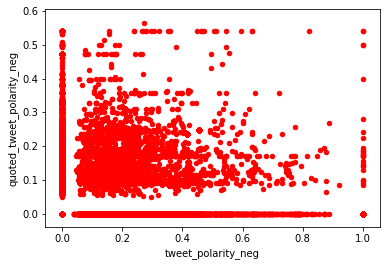

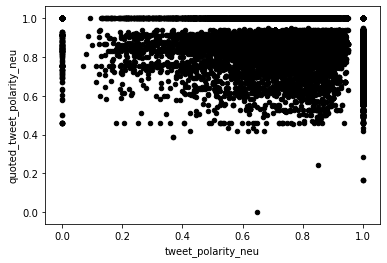

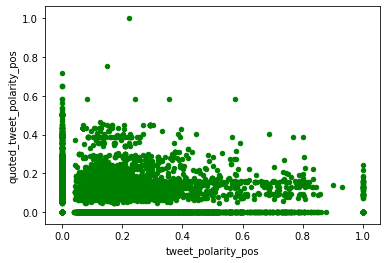

In [11]:
df.plot(kind='scatter',x='tweet_polarity_neg',y='quoted_tweet_polarity_neg',color='red')
df.plot(kind='scatter',x='tweet_polarity_neu',y='quoted_tweet_polarity_neu',color='black')
df.plot(kind='scatter',x='tweet_polarity_pos',y='quoted_tweet_polarity_pos',color='green')
plt.show()

(array([  204.,  1212.,  1024.,  2919.,  3024.,  4839.,  5415.,  2181.,
         2340., 19527.,   598.,  1814.,  1098.,  2353.,  2657.,  1131.,
         2791.,  1754.,   559.,    82.]),
 array([-9.78100e-01, -8.80285e-01, -7.82470e-01, -6.84655e-01,
        -5.86840e-01, -4.89025e-01, -3.91210e-01, -2.93395e-01,
        -1.95580e-01, -9.77650e-02,  5.00000e-05,  9.78650e-02,
         1.95680e-01,  2.93495e-01,  3.91310e-01,  4.89125e-01,
         5.86940e-01,  6.84755e-01,  7.82570e-01,  8.80385e-01,
         9.78200e-01]),
 <a list of 20 Patch objects>)

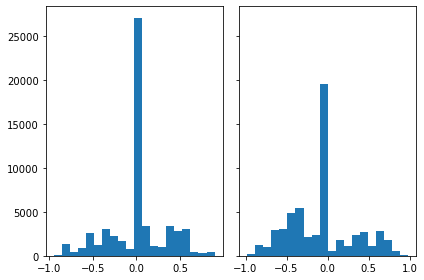

In [60]:
n_bins = 20
# Generate a normal distribution, center at x=0 and y=5
y = df['tweet_polarity_cpd']
x = df['quoted_tweet_polarity_cpd']

fig, axs = plt.subplots(1, 2, sharey=True, tight_layout=True)

# We can set the number of bins with the `bins` kwarg
axs[0].hist(x, bins=n_bins)
axs[1].hist(y, bins=n_bins)

(array([0.02289321, 0.26071776, 0.07416645, 0.16914491, 0.49986671,
        0.22363454, 0.57214116, 0.42891667, 0.3250458 , 0.14246769,
        5.12240399, 0.6368476 , 0.21417453, 0.18295651, 0.6470644 ,
        0.53184153, 0.58216876, 0.08911326, 0.06697684, 0.09062686]),
 array([-0.9413  , -0.849415, -0.75753 , -0.665645, -0.57376 , -0.481875,
        -0.38999 , -0.298105, -0.20622 , -0.114335, -0.02245 ,  0.069435,
         0.16132 ,  0.253205,  0.34509 ,  0.436975,  0.52886 ,  0.620745,
         0.71263 ,  0.804515,  0.8964  ]),
 <a list of 20 Patch objects>)

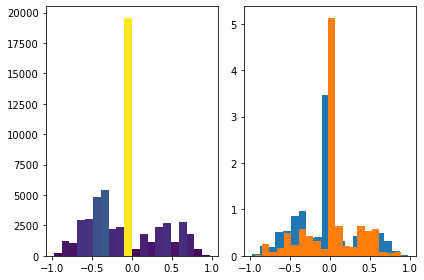

In [61]:
from matplotlib import colors
from matplotlib.ticker import PercentFormatter
fig, axs = plt.subplots(1, 2, tight_layout=True)

# N is the count in each bin, bins is the lower-limit of the bin
N, bins, patches = axs[0].hist(y, bins=n_bins)

# We'll color code by height, but you could use any scalar
fracs = N / N.max()

# we need to normalize the data to 0..1 for the full range of the colormap
norm = colors.Normalize(fracs.min(), fracs.max())

# Now, we'll loop through our objects and set the color of each accordingly
for thisfrac, thispatch in zip(fracs, patches):
    color = plt.cm.viridis(norm(thisfrac))
    thispatch.set_facecolor(color)

# We can also normalize our inputs by the total number of counts
axs[1].hist(y, bins=n_bins, density=True)
axs[1].hist(x, bins=n_bins, density=True)

# Now we format the y-axis to display percentage
# axs[1].yaxis.set_major_formatter(PercentFormatter(xmax=1))

TypeError: 'Normalize' object is not iterable

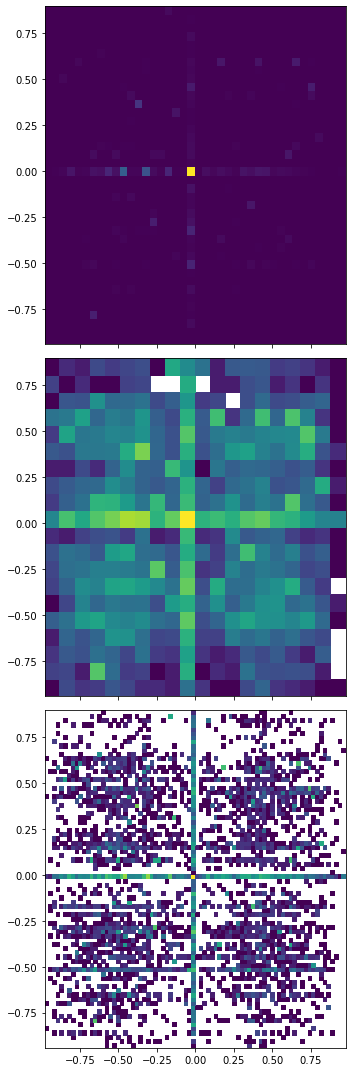

In [41]:
x = df['tweet_polarity_cpd']
y = df['quoted_tweet_polarity_cpd']
fig, axs = plt.subplots(3, 1, figsize=(5, 15), sharex=True, sharey=True, tight_layout=True)

# We can increase the number of bins on each axis
axs[0].hist2d(x, y, bins=40)

# As well as define normalization of the colors
axs[1].hist2d(x, y, bins=20, norm=colors.LogNorm())

# We can also define custom numbers of bins for each axis
axs[2].hist2d(x, y, bins=(80, 80), norm=colors.LogNorm())

#create legend
handles = [Rectangle((0,0),1,1,color=c,ec="k") for c in norm]
# labels= norm
plt.legend(handles, labels)

plt.show()

[[-2.         -1.95959596 -1.91919192 ...  1.91919192  1.95959596
   2.        ]
 [-2.         -1.95959596 -1.91919192 ...  1.91919192  1.95959596
   2.        ]
 [-2.         -1.95959596 -1.91919192 ...  1.91919192  1.95959596
   2.        ]
 ...
 [-2.         -1.95959596 -1.91919192 ...  1.91919192  1.95959596
   2.        ]
 [-2.         -1.95959596 -1.91919192 ...  1.91919192  1.95959596
   2.        ]
 [-2.         -1.95959596 -1.91919192 ...  1.91919192  1.95959596
   2.        ]]


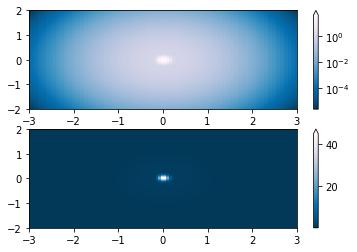

In [39]:
import matplotlib.cbook as cbook

N = 100
X, Y = np.mgrid[-3:3:complex(0, N), -2:2:complex(0, N)]
# X = df['tweet_polarity_neu']
# Y = df['quoted_tweet_polarity_neu']
print(Y)
# A low hump with a spike coming out of the top right.  Needs to have
# z/colour axis on a log scale so we see both hump and spike.  linear
# scale only shows the spike.
Z1 = np.exp(-(X)**2 - (Y)**2)
Z2 = np.exp(-(X * 10)**2 - (Y * 10)**2)
Z = Z1 + 50 * Z2

fig, ax = plt.subplots(2, 1)

pcm = ax[0].pcolor(X, Y, Z,
                   norm=colors.LogNorm(vmin=Z.min(), vmax=Z.max()),
                   cmap='PuBu_r')
fig.colorbar(pcm, ax=ax[0], extend='max')

pcm = ax[1].pcolor(X, Y, Z, cmap='PuBu_r')
fig.colorbar(pcm, ax=ax[1], extend='max')
plt.show()